## **2.2 - Construção de indicadores técnicos**

### *Indicadores*

Indicadores são fórmulas matemáticas aplicadas aos dados de mercado para gerar sinais que auxiliam na interpretação do comportamento de um ativo.

Podem ser representados por gráficos, linhas, osciladores, etc., facilitando a visualização e análise das tendências e padrões.

Ou seja, indicadores são representações gráficas de uma fórmula matemática que auxiliam na tomada de decisões.

Existem vários tipos de indicadores, que no geral são agrupados como:

- Tendência
- Momentum
- Volatilidade
- Volume

Também podemos criar indicadores baseados em dados alternativos, que ao invés de utilizarem cotações, baseiam-se em outras informações, como postagens em redes sociais (sentimento do mercado), relatórios financeiros (dados fundamentalistas), imagens de satélite (produção em áreas agrícolas), etc. Mas isso não será tratado neste tópico.

Esses indicadores que iremos apresentar não servem muita coisa por si só dado a ampla utilização deles no mercado há décadas, hoje eles acabam servindo mais como fatores para alimentar um modelo x. Apesar disso, há diversos artigos científicos fundamentando seu uso, entretanto nos seus backtest o crowding é ignorado -efeito que faz o alfa decair pela ampla exploração da mesma anomalia de mercado- o que implica em resultados inviáveis de serem explorados no dia a dia.

Artigo sobre crowding, caso você se interresse: [CLIQUE AQUI](https://www.pm-research.com/content/iijpormgmt/39/4/14)

### **Indicadores de tendência**

Buscam identificar e acompanhar a direção predominante do movimento dos preços de um ativo financeiro ao longo do tempo.

Ajudam os investidores a entender se o mercado está em uma tendência de alta (bullish), baixa (bearish) ou lateral (sem tendência definida).

No geral, funcionam suavizando flutuações de curto prazo nos preços, destacando a direção subjacente do mercado.

Alguns indicadores são capazes de identificar o início e o final de uma tendência.

Outros são capazes de identificar a força da tendência.

Podem ser utilizados para definir pontos de entrada e saída em operações, melhorando a gestão do risco.

Múltiplas tendências podem existir em diferentes janelas de tempo (timeframes), como hora, dia, semana e mês da cotação.

Exemplos de indicadores de tendência:

- Médias móveis
- Parabolic SAR
- ADX (Average Directional Index)
- DPO (Detrended Price Oscillator)

#### **Médias móveis (SMA, EMA, VWAP)**

As médias móveis são ferramentas estatísticas fundamentais na análise técnica, utilizadas para suavizar a volatilidade dos preços e evidenciar tendências. Neste módulo, abordaremos três tipos principais:

- **SMA (Simple Moving Average)**: Média móvel simples, que calcula a média aritmética dos preços ao longo de um período definido.
- **EMA (Exponential Moving Average)**: Média móvel exponencial, que atribui maior peso aos preços mais recentes, tornando o indicador mais sensível às mudanças.
- **VWAP (Volume Weighted Average Price)**: Média ponderada pelo volume, que integra tanto os preços quanto os volumes negociados, refletindo o preço médio efetivo durante um período.

##### Explicação Didática

- **SMA:**  
  A SMA é calculada somando os preços de fechamento de um determinado número de períodos e dividindo esse total pelo número de períodos. Por exemplo, uma SMA de 10 dias é obtida pela soma dos preços de fechamento dos últimos 10 dias dividida por 10. Essa média é útil para identificar a tendência geral do preço, porém, por tratar todos os períodos de igual importância, pode responder lentamente a mudanças bruscas.

- **EMA:**  
  A EMA utiliza um fator de ponderação que confere maior relevância aos preços mais recentes. A fórmula recursiva para a EMA incorpora um multiplicador, que depende do número de períodos, para ajustar o peso dos dados passados. Isso torna a EMA mais ágil na identificação de mudanças de tendência em comparação à SMA.

- **VWAP:**  
  O VWAP é calculado dividindo o valor total negociado (soma de preço x volume) pelo volume total acumulado durante o período. Esse indicador é amplamente utilizado em negociações intradiárias, pois oferece uma visão mais precisa do preço médio ponderado pelo volume, auxiliando traders na identificação de pontos de suporte e resistência.

##### Recursos Adicionais

- **Pandas:** Explore as funções de janela móvel (rolling) para calcular médias de forma eficiente.  
- **TA-Lib:** Considere utilizar essa biblioteca para implementar indicadores técnicos prontos e realizar comparações.
- **Estudos de Caso:** Pesquise aplicações práticas de médias móveis em estratégias de trading e análise de risco.

Mais informações sobre médias móveis: 
- https://www.infomoney.com.br/guias/medias-moveis-analise-grafica/
- [Artigo da UFRGS sobre implementação de medias moveis](https://lume.ufrgs.br/bitstream/handle/10183/78323/000892034.pdf?sequence=1)

#### **Atividades**

De preferência utilize a mesma ação e calcule-a em uma celúla separada em prol do clean code

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coleta de dados
ticker = "AAPL"
df = yf.download(ticker, period="6mo") # 6 meses de dados
df.index = pd.to_datetime(df.index)
serie_precos = df['Close'].squeeze()
precos = pd.to_numeric(serie_precos, errors='coerce')
print(f"Dados baixados: {df.shape[0]} linhas")
print(df.head())

C:\Users\abgad\AppData\Local\Temp\ipykernel_4148\1355989913.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="6mo") # 6 meses de dados
[*********************100%***********************]  1 of 1 completed

Dados baixados: 127 linhas
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-05-27  199.789368  200.318253  197.015194  197.883377  56288500
2025-05-28  199.998932  202.304076  199.480020  200.168573  45339700
2025-05-29  199.529907  203.381798  198.092930  203.152286  51396800
2025-05-30  200.428024  201.535693  196.366568  198.951123  70819900
2025-06-02  201.276230  201.705334  199.699548  199.859215  35423300


1. **Cálculo da SMA**  
   - **Objetivo:** Desenvolver uma função que calcule a SMA para um conjunto de dados históricos de preços.  
   - **Atividade:**  
     - Implemente uma função em Python que receba uma série de preços e um número de períodos, e retorne a SMA correspondente.
     - Teste sua função com diferentes janelas (ex.: 5, 10 e 20 dias) e compare os resultados.

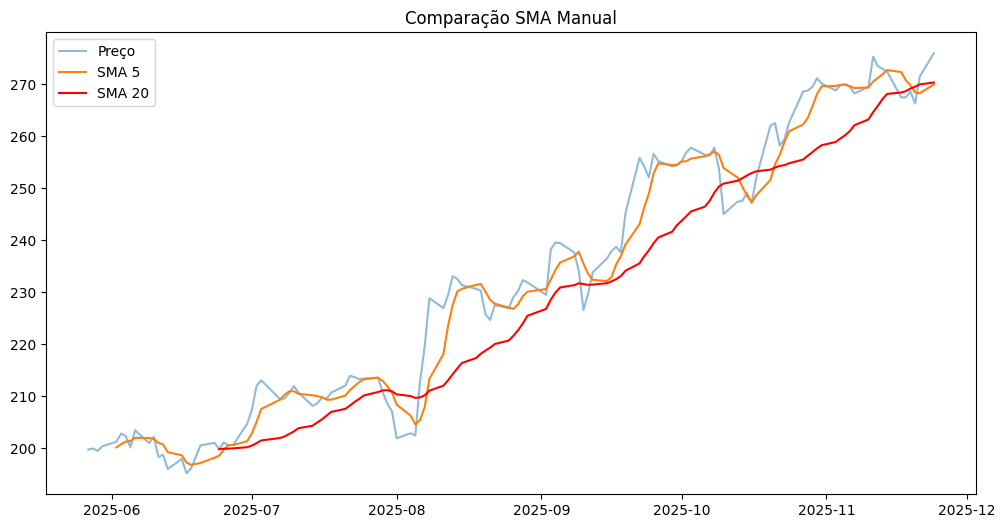

In [2]:
def calcular_sma_manual(dados, janela):
    """
    Calcula a SMA manualmente.
    dados: lista de preços
    janela: número de períodos (ex: 5, 10, 20)
    """
    sma = []
    
    for i in range(len(dados)):
        # Se ainda não tem dados suficientes para a janela (ex: dia 3 de 5)
        if i < janela - 1:
            sma.append(np.nan) # Adiciona valor nulo
        else:
            # Pega os preços da janela atual (do dia 'i' voltando 'janela' dias)
            # Ex: se janela é 5 e i é 10, pega do índice 6 ao 10
            janela_dados = dados[i - janela + 1 : i + 1]
            media = sum(janela_dados) / janela
            sma.append(media)
    
    return pd.Series(sma, index=dados.index)

df['SMA_5'] = calcular_sma_manual(precos, 5)
df['SMA_10'] = calcular_sma_manual(precos, 10)
df['SMA_20'] = calcular_sma_manual(precos, 20)

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Preço', alpha=0.5)
plt.plot(df['SMA_5'], label='SMA 5')
plt.plot(df['SMA_20'], label='SMA 20', color='red')
plt.title("Comparação SMA Manual")
plt.legend()
plt.show()

2. **Implementação da EMA**  
   - **Objetivo:** Entender e aplicar o cálculo da EMA.  
   - **Atividade:**  
     - Implemente uma função que calcule a EMA usando a fórmula recursiva.
     - Pondere sobre como a EMA reage a variações de preço mais recentes, altere a janela para checar as mudanças ocorridas.

C:\Users\abgad\AppData\Local\Temp\ipykernel_4148\3197622165.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_hoje = dados[i]


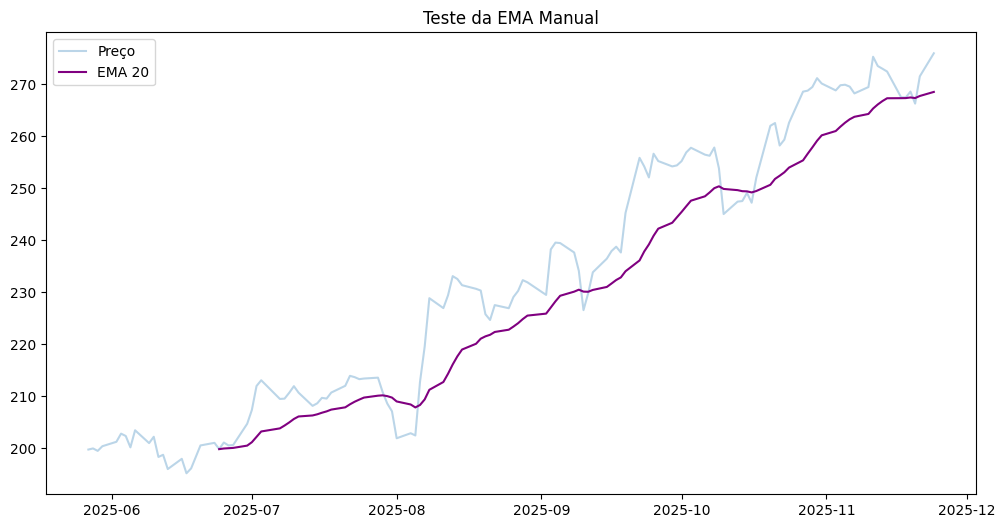

In [3]:
def calcular_ema_manual(dados, janela):
    
    ema = []
    k = 2 / (janela + 1) # O multiplicador de peso
    
    # O primeiro valor da EMA geralmente começa com uma SMA simples
    # ou o próprio preço inicial para simplificar
    ema_anterior = sum(dados[:janela]) / janela # SMA simples do 1º período
    
    # Preencher os primeiros N dias com NaN até ter dados suficientes para a primeira média
    for _ in range(janela-1):
        ema.append(np.nan)
        
    ema.append(ema_anterior) # Adiciona a primeira média calculada
    
    # A partir daí, aplicar a fórmula recursiva
    for i in range(janela, len(dados)):
        preco_hoje = dados[i]
        # Fórmula: (Preço * K) + (EMA_Anterior * (1-K))
        novo_valor_ema = (preco_hoje * k) + (ema_anterior * (1 - k))
        
        ema.append(novo_valor_ema)
        ema_anterior = novo_valor_ema # Atualiza para o próximo loop
        
    return pd.Series(ema, index=dados.index)

df['EMA_20_Manual'] = calcular_ema_manual(precos, 20)

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Preço', alpha=0.3)
plt.plot(df['EMA_20_Manual'], label='EMA 20', color='purple')
plt.title("Teste da EMA Manual")
plt.legend()
plt.show()

3. **Cálculo do VWAP**  
   - **Objetivo:** Integrar volume e preço para calcular o VWAP de uma sessão de negociação.  
   - **Atividade:**  
     - Plote o VWAP juntamente com o preço de fechamento e analise como ele pode sinalizar possíveis pontos de entrada ou saída.

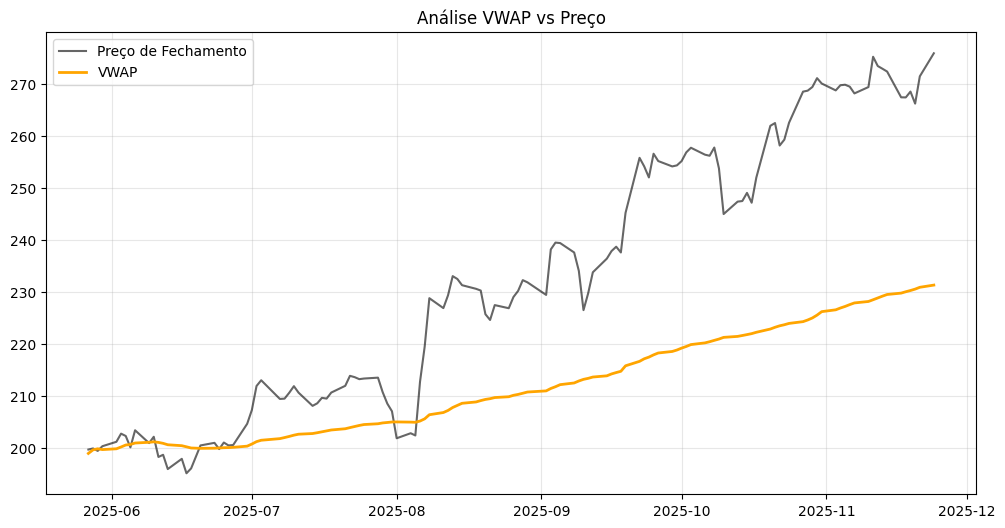

In [4]:
def calcular_vwap_manual(df):
    # 1. Calcular o Preço Típico (Média de Máxima, Mínima e Fechamento)
    preco_tipico = (df['High'] + df['Low'] + df['Close']) / 3
    
    # 2. Multiplicar Preço Típico pelo Volume (Valor Financeiro Movimentado)
    tp_x_vol = preco_tipico * df['Volume']
    
    # 3. Somatório Acumulado do (Preço * Volume)
    total_pv_acumulado = tp_x_vol.cumsum()
    
    # 4. Somatório Acumulado do Volume
    total_vol_acumulado = df['Volume'].cumsum()
    
    # 5. Dividir um pelo outro
    vwap = total_pv_acumulado / total_vol_acumulado
    
    return vwap

df['VWAP'] = calcular_vwap_manual(df)

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Preço de Fechamento', color='black', alpha=0.6)
plt.plot(df['VWAP'], label='VWAP', color='orange', linewidth=2)

plt.title("Análise VWAP vs Preço")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

4. **Análise Comparativa**  
   - **Objetivo:** Comparar a eficácia dos três indicadores em diferentes cenários de mercado.  
   - **Atividade:**  
     - Crie um gráfico que exiba a SMA, EMA e VWAP para o mesmo período de tempo.
     - Discuta as diferenças entre os indicadores e em que situações cada um pode ser mais vantajoso para a tomada de decisão.

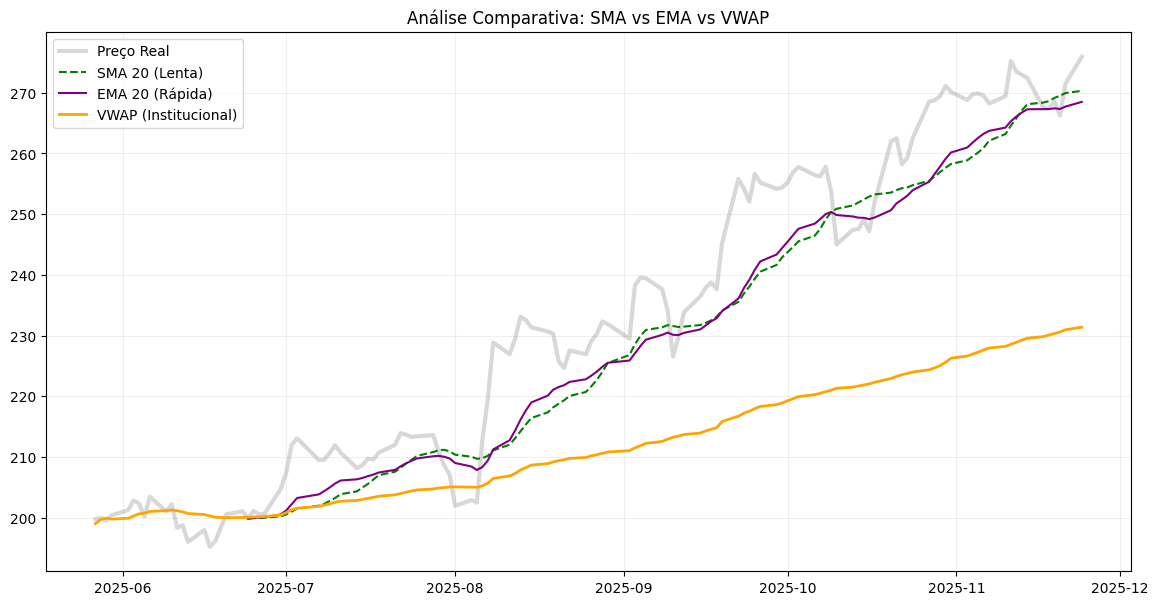

1. SMA (Média Móvel Simples)
Características: Atribui peso igual a todos os dados do período. É o indicador mais estável, porém com maior atraso (lag).
Melhor Uso: Identificação de tendências de longo prazo e eliminação de ruídos de volatilidade diária. Ideal para confirmar a direção geral do ativo (viés).

2. EMA (Média Móvel Exponencial)
Características: Atribui maior peso aos preços mais recentes através de um multiplicador. Reage rapidamente a novas informações de preço.
Melhor Uso: Gatilhos de operação (timing) e gestão de risco (Trailing Stop). É vantajosa para entradas e saídas rápidas em Swing Trade, pois detecta mudanças de direção antes da SMA.

3. VWAP (Preço Médio Ponderado pelo Volume)
Características: Pondera o preço pelo volume financeiro negociado. Representa o 'preço justo' de consenso dos investidores institucionais acumulado no período.
Melhor Uso: Identificação de zonas de liquidez e valor. Funciona como um forte suporte/resistência institucional. Se o preço descola

In [5]:
plt.figure(figsize=(14, 7))

# Preço real
plt.plot(df.index, df['Close'], label='Preço Real', color='gray', alpha=0.3, linewidth=3)

# Os 3 Indicadores
plt.plot(df.index, df['SMA_20'], label='SMA 20 (Lenta)', color='green', linestyle='--')
plt.plot(df.index, df['EMA_20_Manual'], label='EMA 20 (Rápida)', color='purple')
plt.plot(df.index, df['VWAP'], label='VWAP (Institucional)', color='orange', linewidth=2)

plt.title("Análise Comparativa: SMA vs EMA vs VWAP")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

print("1. SMA (Média Móvel Simples)")
print("Características: Atribui peso igual a todos os dados do período. É o indicador mais estável, porém com maior atraso (lag).")
print("Melhor Uso: Identificação de tendências de longo prazo e eliminação de ruídos de volatilidade diária. Ideal para confirmar a direção geral do ativo (viés).\n")
print("2. EMA (Média Móvel Exponencial)")
print("Características: Atribui maior peso aos preços mais recentes através de um multiplicador. Reage rapidamente a novas informações de preço.")
print("Melhor Uso: Gatilhos de operação (timing) e gestão de risco (Trailing Stop). É vantajosa para entradas e saídas rápidas em Swing Trade, pois detecta mudanças de direção antes da SMA.\n")
print("3. VWAP (Preço Médio Ponderado pelo Volume)")
print("Características: Pondera o preço pelo volume financeiro negociado. Representa o 'preço justo' de consenso dos investidores institucionais acumulado no período.")
print("Melhor Uso: Identificação de zonas de liquidez e valor. Funciona como um forte suporte/resistência institucional. Se o preço descola muito da VWAP, tende a retornar a ela (Mean Reversion).")

#### **Parabolic SAR**


<br>
<center>
  <img src="https://commodity.com/wp-content/uploads/technical-analysis/ParabolicSARgoldZG.gif" width="550px">

  <strong>Fonte:</strong>
  `https://commodity.com/technical-analysis/parabolic-sar/`
</center>
<br>

#### Cálculo do Parabolic SAR

O Parabolic SAR (Stop and Reverse) é um indicador técnico desenvolvido por Welles Wilder, utilizado para identificar pontos de reversão de tendência e determinar níveis de suporte e resistência. Em sua representação gráfica, os pontos aparecem abaixo dos preços durante uma tendência de alta e acima dos preços durante uma tendência de baixa.

##### Componentes Principais
- **SAR (Stop and Reverse):** Valor do indicador em cada período.
- **EP (Extreme Point):**  
  - Em uma tendência de alta: o maior preço registrado durante a tendência.  
  - Em uma tendência de baixa: o menor preço registrado durante a tendência.
- **AF (Acceleration Factor):**  
  - Um fator que inicia com um valor base (geralmente 0,02) e é incrementado (por exemplo, +0,02) sempre que o EP é atualizado, até atingir um valor máximo (comummente 0,20).  
  - Esse fator torna o indicador mais sensível à medida que a tendência se fortalece.

##### Fórmulas de Cálculo

- **Para uma tendência de alta:**  
  $SAR_{i+1} = SAR_i + AF \times (EP - SAR_i)$  
  Nesta fórmula, o novo valor do SAR é calculado ajustando o valor anterior com base na distância até o EP e no fator de aceleração, aproximando-se do EP conforme o preço sobe.

- **Para uma tendência de baixa:**  
  $SAR_{i+1} = SAR_i - AF \times (SAR_i - EP)$  
  Aqui, o SAR é ajustado para baixo, aproximando-se do EP (neste caso, o menor preço da tendência) conforme o preço cai.

##### Mecanismo de Funcionamento

1. **Início da Tendência:**  
   Define-se o SAR inicial com base no preço do período anterior e estabelece-se o EP (o maior preço para uma tendência de alta ou o menor preço para uma tendência de baixa).

2. **Atualização do EP:**  
   - Em uma tendência de alta, sempre que um novo máximo é atingido, o EP é atualizado para esse valor.
   - Em uma tendência de baixa, o EP é atualizado sempre que ocorre um novo mínimo.

3. **Ajuste do AF:**  
   Cada atualização do EP resulta em um incremento do AF (até o valor máximo estipulado), o que torna o indicador mais sensível às mudanças recentes de preço.

4. **Cálculo Recursivo:**  
   Para cada novo período, o SAR é recalculado utilizando a fórmula apropriada para a direção da tendência, permitindo um ajuste dinâmico do indicador.

5. **Sinal de Reversão:**  
   Se o preço ultrapassar o SAR calculado (ou seja, cair abaixo do SAR em uma tendência de alta ou subir acima do SAR em uma tendência de baixa), isso indica uma potencial reversão de tendência. Nesse momento, o SAR é recalculado e a direção da tendência é invertida.

Em resumo, o Parabolic SAR utiliza um mecanismo recursivo que combina ajustes dinâmicos (através do AF) e a atualização contínua do EP para oferecer sinais visuais que ajudam a identificar mudanças na direção do mercado.

- **Interpretação:**

  - Pontos abaixo do preço sugerem tendência de alta.

  - Pontos acima do preço sugerem tendência de baixa.

  - **Força da Tendência:** A distância entre os pontos e o preço pode indicar a força da tendência.

Na biblioteca ta do python já existem diversos indicadores implementados, inclusive o parabolic SAR e as médias móveis, então não necessitamos nos dar o trabalho de implementá-los todas as vezes que forem utilizados.
- [Documentação da TA-lib;](https://ta-lib.github.io/ta-lib-python/doc_index.html)
- [Para instalar utilize este link e faça o seu passo-a-passo;](https://github.com/TA-Lib/ta-lib-python)
- Recomenda-se que seja lida a documentação.

Dados prontos! Linhas: 108
Colunas: ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_5', 'SMA_10', 'SMA_20', 'EMA_20_Manual', 'VWAP', 'psar']
Sucesso: Indicador calculado!

Price       Close        psar
103    267.440002  277.051436
104    268.559998  276.934121
105    266.250000  276.817980
106    271.489990  276.703001
107    275.920013  265.320007


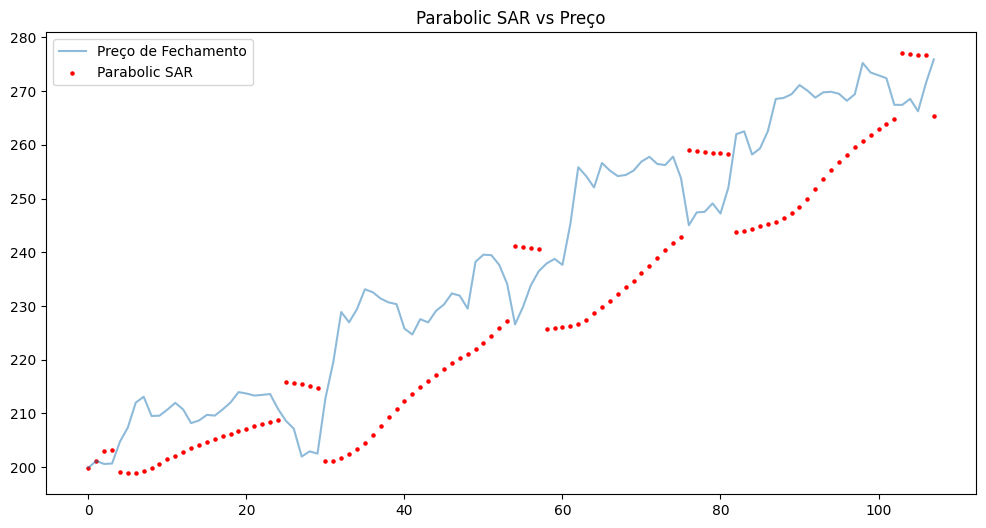

In [11]:
import pandas as pd
import ta

if isinstance(df.columns, pd.MultiIndex):
     df.columns = df.columns.get_level_values(0)
df = df.loc[:, ~df.columns.duplicated()]

cols = ['High', 'Low', 'Close']
for col in cols:
    # Garante que é numérico
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()
df = df.reset_index(drop=True)

print(f"Dados prontos! Linhas: {len(df)}")
print(f"Colunas: {df.columns.tolist()}")

if len(df) > 0:
    indicator = ta.trend.PSARIndicator(
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        step=0.01,
    )
    df['psar'] = indicator.psar()
    print("Sucesso: Indicador calculado!\n")

    # Ver as últimas 5 linhas com a nova coluna 'psar'
print(df[['Close', 'psar']].tail())

# Opcional: Plotar para visualizar os pontos (fica mais fácil de entender)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Preço de Fechamento', alpha=0.5)
plt.scatter(df.index, df['psar'], label='Parabolic SAR', color='red', s=5)
plt.legend()
plt.title("Parabolic SAR vs Preço")
plt.show()

#### **Indicador de tendência de força relativa (ADX)**

#### ADX (Indicador de Tendência Relativa)

O ADX (Average Directional Index) é um indicador técnico desenvolvido por Welles Wilder que mede a força de uma tendência, independentemente da sua direção (alta ou baixa). Diferente de outros indicadores que apontam a direção do movimento, o ADX foca exclusivamente na intensidade da tendência. Ele é frequentemente utilizado em conjunto com os indicadores de movimento direcional positivo (+DI) e negativo (-DI), que auxiliam na identificação da direção predominante do mercado.

##### Componentes e Conceitos

- **True Range (TR):** Mede a volatilidade diária e é calculado como o máximo entre:
  - A diferença entre a máxima e a mínima do dia.
  - A diferença absoluta entre a máxima do dia e o fechamento do dia anterior.
  - A diferença absoluta entre a mínima do dia e o fechamento do dia anterior.
  
  $$ TR = \max\{(High - Low),\; |High - Close_{prev}|,\; |Low - Close_{prev}|\} $$

- **Directional Movement (+DM e -DM):**  
  - **+DM (Movimento Direcional Positivo):** Diferença entre a máxima atual e a máxima do período anterior, se for maior que a variação negativa e maior que zero.
  - **-DM (Movimento Direcional Negativo):** Diferença entre a mínima do período anterior e a mínima atual, se for maior que a variação positiva e maior que zero.

- **Smoothed Values:**  
  Para reduzir ruídos, os valores de TR, +DM e -DM são suavizados, geralmente utilizando uma média móvel exponencial ou uma média móvel simples ao longo de 14 períodos.

##### Cálculo dos Indicadores

1. **Cálculo dos Índices Direcionais (+DI e -DI):**

   Após suavizar o TR, +DM e -DM, calcula-se:
   
   $$ +DI = 100 \times \frac{\text{Smoothed } +DM}{\text{Smoothed TR}} $$
   
   $$ -DI = 100 \times \frac{\text{Smoothed } -DM}{\text{Smoothed TR}} $$

2. **Cálculo do DX (Directional Index):**

   O DX é uma medida da diferença relativa entre os dois DI’s:
   
   $$ DX = 100 \times \frac{|+DI - -DI|}{+DI + -DI} $$

3. **Cálculo do ADX:**

   O ADX é a média móvel dos valores do DX, normalmente calculada em 14 períodos:
   
   $$ ADX = \text{Média Móvel de } DX $$
   
   Essa média suaviza as variações diárias do DX, fornecendo uma indicação mais estável da força da tendência.

##### Interpretação

- **ADX Alto (por exemplo, acima de 25):** Indica que o mercado está em uma tendência forte, seja de alta ou de baixa.
- **ADX Baixo (por exemplo, abaixo de 20):** Sugere que o mercado está em uma fase de consolidação ou sem uma tendência definida.


Abaixo vocês podem observar como a biblioteca TA-Lib nos será útil ao longo deste curso:

C:\Users\abgad\AppData\Local\Temp\ipykernel_4148\3546078816.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='1y')
[*********************100%***********************]  1 of 1 completed


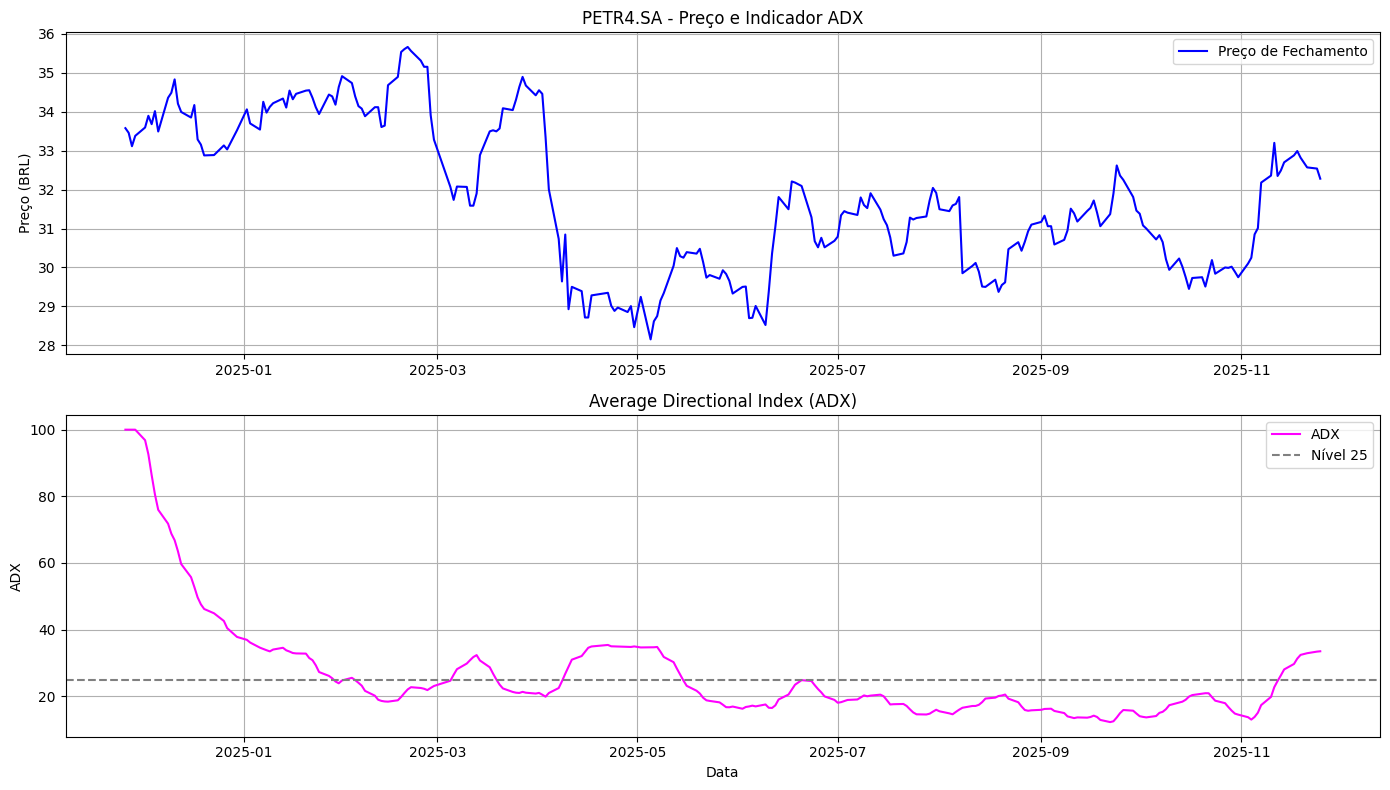

In [7]:
### Cocidog sem TA-Lib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definir o ticker de uma ação brasileira (ex: PETR4 - Petrobras)
ticker = 'PETR4.SA'
# Baixar dados históricos do último ano
data = yf.download(ticker, period='1y')

# Cálculo do True Range (TR)
data['H-L'] = data['High'] - data['Low']
data['H-PC'] = abs(data['High'] - data['Close'].shift(1))
data['L-PC'] = abs(data['Low'] - data['Close'].shift(1))
data['TR'] = data[['H-L', 'H-PC', 'L-PC']].max(axis=1)

# Cálculo do Directional Movement
data['up_move'] = data['High'] - data['High'].shift(1)
data['down_move'] = data['Low'].shift(1) - data['Low']

# +DM: Movimento direcional positivo
data['+DM'] = np.where((data['up_move'] > data['down_move']) & (data['up_move'] > 0), data['up_move'], 0)
# -DM: Movimento direcional negativo
data['-DM'] = np.where((data['down_move'] > data['up_move']) & (data['down_move'] > 0), data['down_move'], 0)

# Período para o cálculo (geralmente 14 dias)
period = 14

# Suavização dos valores utilizando o método de Wilder (que pode ser aproximado pelo EWMA com alpha=1/period)
data['TR_smoothed'] = data['TR'].ewm(alpha=1/period, adjust=False).mean()
data['+DM_smoothed'] = data['+DM'].ewm(alpha=1/period, adjust=False).mean()
data['-DM_smoothed'] = data['-DM'].ewm(alpha=1/period, adjust=False).mean()

# Cálculo dos indicadores +DI e -DI
data['+DI'] = 100 * (data['+DM_smoothed'] / data['TR_smoothed'])
data['-DI'] = 100 * (data['-DM_smoothed'] / data['TR_smoothed'])

# Cálculo do DX (índice direcional)
data['DX'] = 100 * abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])

# Cálculo do ADX: média suavizada do DX
data['ADX'] = data['DX'].ewm(alpha=1/period, adjust=False).mean()

# Remover valores nulos gerados pelo shift e cálculos iniciais
data = data.dropna()

# Plotando o gráfico do preço de fechamento e do ADX
plt.figure(figsize=(14,8))

# Gráfico 1: Preço de Fechamento
plt.subplot(2,1,1)
plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='blue')
plt.title(f"{ticker} - Preço e Indicador ADX")
plt.ylabel("Preço (BRL)")
plt.legend()
plt.grid(True)

# Gráfico 2: ADX
plt.subplot(2,1,2)
plt.plot(data.index, data['ADX'], label='ADX', color='magenta')
plt.axhline(25, color='grey', linestyle='--', label='Nível 25')
plt.title("Average Directional Index (ADX)")
plt.xlabel("Data")
plt.ylabel("ADX")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Agora vamos diminuir bastante a sintaxe carregada do código utilizando a bilioteca TA:

In [12]:
import ta

# Definir o ticker de uma ação brasileira (ex: PETR4 - Petrobras)
ticker = 'PETR4.SA'
# Baixar dados históricos do último ano
data = yf.download(ticker, period='1y')

# Remover possíveis valores nulos
data = data.dropna()

# Utilizando TA-lib para calcular o ADX com período de 14 dias
data['ADX'] = ta.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)

# Plotando o gráfico do preço de fechamento e do ADX
plt.figure(figsize=(14,8))

# Gráfico 1: Preço de Fechamento
plt.subplot(2,1,1)
plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='blue')
plt.title(f"{ticker} - Preço e Indicador ADX")
plt.ylabel("Preço (BRL)")
plt.legend()
plt.grid(True)

# Gráfico 2: ADX
plt.subplot(2,1,2)
plt.plot(data.index, data['ADX'], label='ADX', color='magenta')
plt.axhline(25, color='grey', linestyle='--', label='Nível 25')
plt.title("Average Directional Index (ADX)")
plt.xlabel("Data")
plt.ylabel("ADX")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\abgad\AppData\Local\Temp\ipykernel_4148\2331705021.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='1y')
[*********************100%***********************]  1 of 1 completed


AttributeError: module 'ta' has no attribute 'ADX'

### **Indicadores de momentum**

## Indicadores de momentum


 Indicadores de momentum buscam identificar a **velocidade ou força de uma tendência**.

 O termo "momentum" refere-se à quantidade de movimento ou força de um ativo durante um determinado período de tempo.

 Ele é baseado na ideia de que **movimentos de tendência de preços podem ganhar ou perder força**, o que pode ser um indicativo da continuação ou reversão deles.

 Um **alto momentum** indica uma rápida mudança de preço, enquanto um **baixo momentum** sugere que o preço está mudando lentamente.

**Inércia dos Preços:** assim como a inércia em física, o conceito de momentum sugere que uma vez que um ativo começa a se mover em uma direção, é provável que continue a se mover nessa direção, a menos que uma força externa (como notícias ou eventos macroeconômicos) cause uma mudança.

Evidentemente, o cálculo de indicadores de momentum não é extremamente preciso, entretanto, ao ser combinado com outros indicadores, seja para a análise técnica propriamente dita ou para alimentar modelos de ML(Machile Learning), pode ser bastante útil e relevante.

 Exemplos de indicadores de momentum:

  - RSI (Relative Strength Index)
  - Oscilador Estocástico

#### **Índice de Força Relativa (RSI)**


<br>
<center>
  <img src="https://commodity.com/wp-content/uploads/technical-analysis/RSIEBAYbuysell.gif" width="550px">

  <strong>Fonte:</strong>
  `https://commodity.com/technical-analysis/relative-strength-index/`
</center>
<br>


O RSI, ou Índice de Força Relativa, é um indicador de momentum criado por Welles Wilder que mede a velocidade e a mudança dos movimentos de preço. Ele varia de 0 a 100 e é amplamente utilizado para identificar condições de sobrecompra e sobrevenda de um ativo, sinalizando possíveis pontos de reversão.

##### Conceitos e Cálculo

- **Objetivo:**  
  O RSI busca quantificar a força de uma tendência comparando a magnitude dos ganhos e das perdas em um determinado período, normalmente 14 períodos.

- **Etapas do Cálculo:**

  1. **Determinação das variações diárias:**  
     Para cada período, calcula-se a variação do preço:
     - Se a variação for positiva, ela é considerada ganho.
     - Se a variação for negativa, ela é considerada perda (usando o valor absoluto).

  2. **Cálculo das médias de ganhos e perdas:**  
     - **Média dos Ganhos (MG):** Média das variações positivas ao longo do período escolhido.  
     - **Média das Perdas (MP):** Média das variações negativas (como valores absolutos) ao longo do mesmo período.

  3. **Cálculo da Razão de Força (RS):**  
     $$ RS = \frac{\text{Média dos Ganhos (MG)}}{\text{Média das Perdas (MP)}} $$

  4. **Cálculo do RSI:**  
     A partir do RS, o RSI é calculado pela fórmula:
     $$ RSI = 100 - \frac{100}{1 + RS} $$

##### Interpretação

- **Condições de Sobrecompra e Survenda:**  
  - **RSI > 70:** Geralmente indica que o ativo pode estar sobrecomprado, sugerindo a possibilidade de uma correção ou reversão de tendência.  
  - **RSI < 30:** Sugere que o ativo pode estar sobrevendido, o que pode ser um sinal de uma recuperação iminente.

- **Divergências:**  
  Quando o preço forma topos ou fundos que não são confirmados pelo RSI, isso pode indicar uma divergência. Tais divergências podem sinalizar que a tendência atual está perdendo força e uma reversão pode ocorrer.


No código abaixo, podemos observar o RSI e o valor de fechamento real da PETR4, análise o que ocorre e se as tendências indicadas pelo RSI são confirmadas nos preços e também como foi criado o código python para a plotagem e para o calculo do índice e dos preços.

Head dos dados filtrados:
            1. open  2. high  3. low  4. close    5. volume
date                                                       
2023-01-02    23.54    23.81   22.80     22.92   78424700.0
2023-01-03    22.94    23.10   22.13     22.34   96750300.0
2023-01-04    21.96    23.59   21.83     23.05  129504000.0
2023-01-05    23.34    24.04   23.15     23.88   73886000.0
2023-01-06    23.94    24.32   23.55     23.74   51851500.0
Formato dos dados: (499, 5)


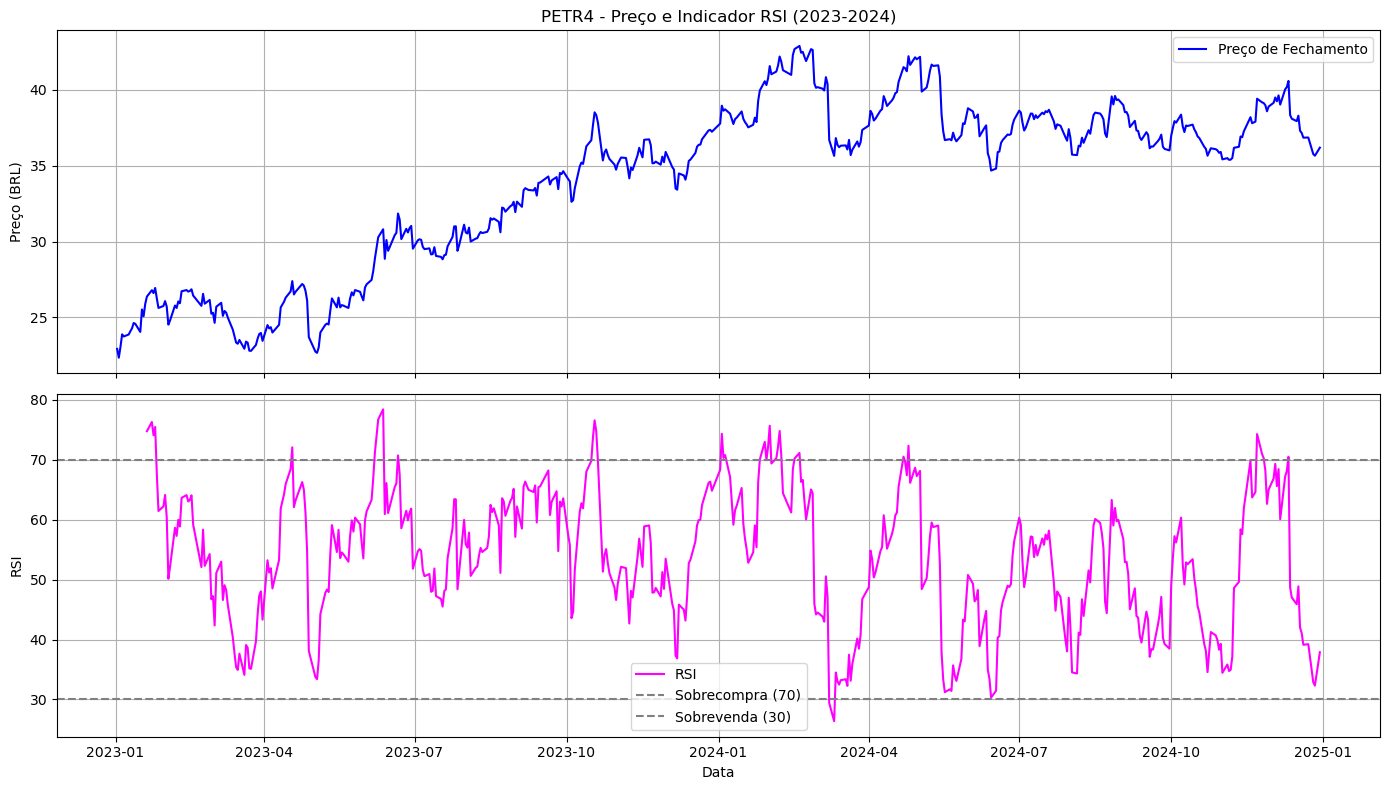

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import talib
import matplotlib.pyplot as plt
import pandas as pd

# Insira sua chave de API do Alpha Vantage
api_key = 'SUA_CHAVE_API'

# Cria uma instância da classe TimeSeries com output no formato pandas
ts = TimeSeries(key=api_key, output_format='pandas')

# Obter dados diários para a ação PETR4 (verifique se o ticker está correto)
data, meta_data = ts.get_daily(symbol='PETR4.SAO', outputsize='full')

# Converter o índice para datetime (se ainda não foi feito)
data.index = pd.to_datetime(data.index)

### 
# Aqui ordenamos o dataframe em ordem crescente de data, pois o padrão do Alpha Vantage é do mais recente para o mais antiga
###
data.sort_index(inplace=True)

# Filtrar dados para os anos de 2023 e 2024
start_date = pd.to_datetime('2023-01-01')
end_date   = pd.to_datetime('2024-12-31')
data = data.loc[start_date:end_date]

# Verificar se há dados disponíveis para o período solicitado
print("Head dos dados filtrados:")
print(data.head())
print("Formato dos dados:", data.shape)

if data.empty:
    print("O DataFrame está vazio. Verifique se o ticker e o período estão corretos.")
else:
    # Remover possíveis valores nulos
    data = data.dropna()

    # Utilizar TA-lib para calcular o RSI com período de 14 dias
    # Garantir que o array de preços seja 1D
    close_prices = data['4. close'].to_numpy().flatten()
    data['RSI'] = talib.RSI(close_prices, timeperiod=14)

    # Criar uma figura com subplots que compartilham o mesmo eixo X (escala temporal)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(14, 8))

    # Gráfico 1: Preço de Fechamento
    ax1.plot(data.index, data['4. close'], label='Preço de Fechamento', color='blue')
    ax1.set_title("PETR4 - Preço e Indicador RSI (2023-2024)")
    ax1.set_ylabel("Preço (BRL)")
    ax1.legend()
    ax1.grid(True)

    # Gráfico 2: RSI
    ax2.plot(data.index, data['RSI'], label='RSI', color='magenta')
    ax2.axhline(70, color='grey', linestyle='--', label='Sobrecompra (70)')
    ax2.axhline(30, color='grey', linestyle='--', label='Sobrevenda (30)')
    ax2.set_xlabel("Data")
    ax2.set_ylabel("RSI")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Observando o código, vocês encontram algumas checagens e procedimentos em cima dos dados a serem trabalhos, checagem se o df está vazio, mudança na ordem das data pré-slicing dos dados, etc.
Isso tudo serve para prevenir erros e indetificá-los caso ocorram, levem isso para toda análise quantitativa que farão.

#### **Oscilador Estocástico (STOCH)**

O Oscilador Estocástico é um indicador de momentum desenvolvido por George C. Lane, que compara o preço de fechamento de um ativo com a sua faixa de preços durante um período específico. Ele auxilia na identificação de condições de sobrecompra e sobrevenda, sugerindo possíveis pontos de reversão na tendência.

##### Componentes e Cálculos

- **%K (Linha Rápida):**  
  Representa o valor atual do oscilador. É calculado por:
  
  $$
  \%K = \frac{\text{Preço de Fechamento} - \text{Mínimo Móvel}}{\text{Máximo Móvel} - \text{Mínimo Móvel}} \times 100
  $$
  
  Onde:
  - **Preço de Fechamento:** Valor de fechamento do período atual.
  - **Mínimo Móvel:** Menor preço registrado durante o período de análise.
  - **Máximo Móvel:** Maior preço registrado durante o mesmo período.

- **%D (Linha Lenta):**  
  É a média móvel de %K (geralmente uma média simples de 3 períodos) e serve para suavizar os sinais do %K:
  
  $$
  \%D = \text{Média Móvel de } \%K
  $$

##### Interpretação dos Sinais

- **Condições de Sobrecompra:**  
  Valores acima de 80 podem indicar que o ativo está sobrecomprado, sugerindo um possível enfraquecimento da tendência de alta e a iminência de uma reversão para baixa.

- **Condições de Sobrevenda:**  
  Valores abaixo de 20 podem indicar que o ativo está sobrevendido, sugerindo que a pressão vendedora pode estar se esgotando e uma reversão para alta pode ocorrer.

- **Cruzamentos entre %K e %D:**  
  - **Cruzamento de alta (sinal de compra):** Ocorre quando a linha %K cruza de baixo para cima da linha %D, indicando o início de um momentum de alta.
  - **Cruzamento de baixa (sinal de venda):** Ocorre quando a linha %K cruza de cima para baixo da linha %D, sugerindo o início de um momentum de baixa.

Mais fontes: 
[Trading View](https://br.tradingview.com/support/solutions/43000502332/), 
[XP Investimentos](https://conteudos.xpi.com.br/aprenda-a-investir/relatorios/estocastico/)

#### Utilização do Oscilador Estocástico na TA-Lib

A TA-Lib fornece funções que permitem calcular o Oscilador Estocástico de forma simples e direta. Esse indicador de momentum compara o preço de fechamento de um ativo com sua faixa de preços durante um período específico, ajudando a identificar condições de sobrecompra e sobrevenda.

##### Função `talib.STOCH`

A função principal para calcular o oscilador estocástico na TA-Lib é a `talib.STOCH`, que retorna duas séries:
- **%K (Linha Rápida):** Indica a posição do preço de fechamento atual em relação à faixa de preços (mínimo e máximo) do período.
- **%D (Linha Lenta):** É a média móvel da linha %K, utilizada para suavizar os sinais.

A sintaxe básica da função é:

```python
slowk, slowd = talib.STOCH(high, low, close,
                           fastk_period=14,    # Período para cálculo da %K
                           slowk_period=3,     # Período de suavização da %K
                           slowk_matype=0,     # Tipo de média móvel para a %K (0 = SMA, 1 = EMA, etc.)
                           slowd_period=3,     # Período para cálculo da %D (média móvel da %K)
                           slowd_matype=0)     # Tipo de média móvel para a %D


1. **Análise Comparativa:**
   - Compare o uso do STOCH com o RSI, as suas divergências e convergências.
   - **Atividade:**
     - Calcule o Oscilador Estocástico e o RSI para o mesmo ativo e período.
     - Plote ambos os indicadores e discuta as situações em que os sinais se complementam ou divergem.
     - Analise a eficácia dos sinais para confirmar reversões ou a continuidade da tendência.

### **Indicadores de volatilidade**
 Indicam o **quanto e o quão rápido** os preços de um ativo estão mudando.

 Medem a **magnitude das variações de preço** de um ativo financeiro ao longo do tempo.

Eles são usados para avaliar o **nível de incerteza ou risco** associado ao movimento dos preços de um ativo.

 A volatilidade representa a **variabilidade dos retornos** de um ativo.

 Quanto maior a volatilidade, maior a **variação dos preços**.

 **Alta volatilidade** indica um maior risco, mas também maior potencial de retorno.

 Períodos de alta volatilidade podem ser causados por eventos de mercado, notícias econômicas, ou mudanças significativas na oferta e demanda.

 **Baixa volatilidade** indica um menor risco, mas também menor potencial de retorno.

 Pode sugerir um mercado estável ou uma falta de interesse no ativo.

 Exemplos de indicadores de volatilidade:

  - Desvio Padrão dos Retornos
  - [Bollinger Bands](https://www.infomoney.com.br/guias/bandas-bollinger/)
  - [Average True Range (ATR)](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/atr#:~:text=Description,daily%2C%20weekly%2C%20or%20monthly.)

#### **Desvio Padrão dos Retornos**

#### Desvio Padrão dos Retornos

O Desvio Padrão dos Retornos é um indicador de volatilidade que quantifica a dispersão dos retornos de um ativo em torno de sua média. Em outras palavras, ele mede o quão "variados" ou "espalhados" são os retornos diários (ou de outro período) de um ativo, permitindo que analistas e traders entendam melhor o risco associado a ele.

##### Conceitos e Cálculo

1. **Retorno:**  
   O retorno de um ativo para um determinado período é calculado geralmente como a variação percentual do preço de fechamento:
   $$
   Retorno_t = \frac{Preço_{t} - Preço_{t-1}}{Preço_{t-1}}
   $$
   ou, equivalentemente,
   $$
   Retorno_t = \frac{Preço_{t}}{Preço_{t-1}} - 1
   $$

2. **Média dos Retornos:**  
   Após calcular os retornos para cada período, a média dos retornos (\(\mu\)) é determinada:
   $$
   \mu = \frac{1}{N} \sum_{t=1}^{N} Retorno_t
   $$
   onde \(N\) é o número de períodos analisados.

3. **Desvio Padrão dos Retornos:**  
   O desvio padrão (\(\sigma\)) mede a dispersão dos retornos em relação à média:
   $$
   \sigma = \sqrt{\frac{1}{N} \sum_{t=1}^{N} \left(Retorno_t - \mu\right)^2}
   $$
   Um desvio padrão maior indica maior volatilidade, ou seja, os retornos se dispersam amplamente em torno da média, enquanto um valor menor indica retornos mais concentrados.

##### Interpretação

- **Volatilidade:**  
  Um alto desvio padrão dos retornos sugere que o ativo é mais volátil, podendo apresentar movimentos de preço mais bruscos, o que, por sua vez, pode estar associado a um maior risco.  
  Um desvio padrão baixo indica que os retornos estão mais próximos da média, sinalizando menor volatilidade e, geralmente, menor risco.

- **Gestão de Risco:**  
  Investidores e gestores de carteira usam esse indicador para ajustar o tamanho das posições e definir limites de stop loss, além de comparar o risco entre diferentes ativos.

##### Exercícios
Agora crie em python um código para calcular o Desvio Padrão dos Retornos e plotá-los em um gráfico junto ao preço de fechmaento do ativo, para que, assim, possamos tirar conclusões sobre o significado desse indicador de volatilidade.

In [ ]:
### Seu código AQUI

Pesquise o que está sendo pressuposto para tomarmos isso como uma medida de volatilidade. 
Dica: Pesquise sobre normalidade e independência estatística.

#### **Bandas de Bollinger**
As Bandas de Bollinger são um indicador de volatilidade desenvolvido por John Bollinger, que ajuda a identificar períodos de alta ou baixa volatilidade e potenciais pontos de reversão. Elas consistem em três linhas que envolvem o preço do ativo:

- **Linha Central:** Geralmente é uma média móvel simples (SMA) de um determinado período.
- **Banda Superior:** É calculada somando-se um múltiplo (normalmente 2) do desvio padrão à média móvel.
- **Banda Inferior:** É calculada subtraindo-se o mesmo múltiplo do desvio padrão da média móvel.

##### Fórmulas

1. **Média Móvel Simples (SMA):**

   $$
   \text{SMA}_n = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}
   $$

   Onde \( P_t \) representa o preço no período \( t \) e \( n \) é o número de períodos.

2. **Desvio Padrão (σ):**

   $$
   \sigma_n = \sqrt{\frac{1}{n} \sum_{i=0}^{n-1} (P_{t-i} - \text{SMA}_n)^2}
   $$

3. **Banda Superior e Inferior:**

   $$
   \text{Banda Superior} = \text{SMA}_n + (k \times \sigma_n)
   $$

   $$
   \text{Banda Inferior} = \text{SMA}_n - (k \times \sigma_n)
   $$

   Geralmente, o valor de \( k \) é 2.

##### Interpretação

- **Contração das Bandas:** Quando as bandas se estreitam, significa que a volatilidade está baixa. Essa situação pode preceder uma grande movimentação do preço.
- **Expansão das Bandas:** Quando as bandas se alargam, indica alta volatilidade.
- **Toques nas Bandas:** 
  - Se o preço toca ou ultrapassa a banda superior, o ativo pode estar sobrecomprado.
  - Se o preço toca ou cai abaixo da banda inferior, o ativo pode estar sobrevendido.

##### Aplicações Práticas

- **Sinais de Reversão:** Alguns traders observam toques ou rompimentos das bandas para identificar potenciais pontos de reversão. No entanto, o toque isolado pode não ser suficiente para tomar decisões; é aconselhável utilizar outros indicadores ou confirmações.
- **Gestão de Risco:** As bandas podem ajudar a definir níveis de stop loss ou pontos de entrada/saída, já que indicam zonas de alta e baixa volatilidade.

Abaixo calcularemos as bandas de bollinger utilizando a biblioteca TA-lib, o código está incompleto, então corrigia-o completando os dados financeiros.

In [ ]:
import talib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Complete o código e para que o plot saia corretamente, utilize a lib de sua preferência, yfinance ou alpha_vantage

# Plotando os resultados
plt.figure(figsize=(10,5))
plt.plot(close, label='Preço de Fechamento', color='blue')
plt.plot(middleband, label='SMA (20 dias)', color='black')
plt.plot(upperband, label='Banda Superior', color='green')
plt.plot(lowerband, label='Banda Inferior', color='red')
plt.title("Bandas de Bollinger")
plt.xlabel("Período")
plt.ylabel("Preço")
plt.legend()
plt.grid(True)
plt.show()

Após completar o código, observe em que momentos as Bandas de Bollinger falham em detectar os padrões. E abaixo veremos uma possível explicação para os erros e um aprofundamento das Bandas de Bollinger

#### Bandas de Bollinger: O Valor do Multiplicador "k"

As Bandas de Bollinger são compostas por uma média móvel central (geralmente uma SMA) e duas bandas — uma superior e uma inferior — que são definidas adicionando e subtraindo um múltiplo do desvio padrão da média. Esse múltiplo é representado por "k" e, na prática, o valor mais comumente adotado é 2.

##### Por Que Utilizar k = 2?

- **Fundamento Estatístico:**  
  Se assumirmos que os preços seguem uma distribuição normal, cerca de 95% dos valores estarão dentro de 2 desvios padrão da média (regra empírica 68-95-99,7). Assim, definir k = 2 faz com que as bandas englobem aproximadamente 95% dos movimentos de preço em condições normais de mercado.

- **Praticidade na Interpretação:**  
  O valor de 2 é amplamente utilizado porque torna a visualização dos sinais mais intuitiva:  
  - Quando o preço ultrapassa a banda superior, pode ser um indicativo de sobrecompra.  
  - Quando o preço cai abaixo da banda inferior, pode sugerir sobrevenda.  
  Esses extremos são usados como alertas para possíveis reversões de tendência ou ajustes de correção.

- **Eficácia Empírica:**  
  Embora os preços nem sempre sigam uma distribuição perfeitamente normal — muitas vezes apresentando caudas mais pesadas —, a configuração com k = 2 tem se mostrado eficaz em diversos mercados e períodos históricos, servindo como um bom ponto de partida para a análise técnica.

##### Referências

- [Bollinger, J. (2001).** *Bollinger on Bollinger Bands.* McGraw-Hill.](https://annas-archive.org/md5/2f9f9305c4921551b289e57fa7adc3ed)

##### Considerações Finais

A escolha de k = 2 não é arbitrária, mas sim fundamentada na teoria da estatística aplicada ao comportamento dos preços. Essa configuração permite que as Bandas de Bollinger ofereçam uma visão equilibrada da volatilidade, ajudando a identificar pontos de reversão e a avaliar condições de mercado extremos, como sobrecompra e sobrevenda. Apesar das limitações da hipótese de normalidade nos mercados financeiros, o uso de k = 2 continua sendo um padrão amplamente adotado na prática da análise técnica.


##### Exercício
Agora que você tem uma ideia melhor do por que alguns indicadores falham, verifique a normalidade dos retornos em que foram trabalhados os últimos indicadores e cheque se isso serve como uma explicação para as falhas.

In [ ]:
# Seu código AQUI

#### **ATR (Average True Range)**

O ATR é um indicador de volatilidade desenvolvido por J. Welles Wilder Jr. que mede a amplitude dos movimentos de preço ao longo de um período, considerando inclusive os gaps (diferenças entre o fechamento de um período e a abertura do próximo). Ele é amplamente utilizado para avaliar a volatilidade do mercado e para definir níveis de stop-loss e dimensionamento de posições.

##### Cálculo do ATR

1. **True Range (TR):**  
   Para cada período, calcula-se o True Range, que é definido como o maior valor entre:
   - A diferença entre a máxima e a mínima do período atual.
   - A diferença absoluta entre a máxima do período atual e o fechamento do período anterior.
   - A diferença absoluta entre a mínima do período atual e o fechamento do período anterior.
   
   Matemáticamente:
   
   $$
   TR_t = \max\{High_t - Low_t,\; |High_t - Close_{t-1}|,\; |Low_t - Close_{t-1}|\}
   $$

2. **Average True Range (ATR):**  
   O ATR é a média móvel (geralmente uma média simples ou exponencial) dos valores de TR ao longo de um determinado número de períodos, comumente 14 períodos:
   
   $$
   ATR = \frac{1}{n} \sum_{i=1}^{n} TR_i
   $$

##### Interpretação e Aplicações

- **Volatilidade:**  
  Um ATR maior indica que os preços têm se movimentado de forma mais ampla e, portanto, o mercado está mais volátil. Um ATR menor indica menor volatilidade.
  
- **Uso Prático em Trading:**  
  - **Definição de Stop-Loss:** Traders frequentemente utilizam o ATR para definir níveis de stop-loss que se ajustem à volatilidade atual. Por exemplo, um stop-loss pode ser posicionado a 1.5 ou 2 vezes o valor do ATR a partir do preço de entrada.
  - **Dimensionamento de Posições:** Em mercados mais voláteis, os traders podem optar por reduzir o tamanho da posição para controlar o risco.

##### Suposições e Comparações com o Desvio Padrão dos Retornos


No caso do ATR, diferentemente do Desvio Padrão dos Retornos e das Bandas de Bollinger:

- **Não se Assume uma Distribuição Específica:**  
  O ATR não pressupõe que os preços ou retornos sigam uma distribuição normal. Ele mede a amplitude real dos movimentos de preço, incluindo gaps, o que pode fornecer uma visão mais completa da volatilidade, especialmente em mercados com "caudas pesadas" ou eventos extremos.


##### Exercício
Ao fim deste tópico, compare os 3 indicadores de volatilidade apresentados em um único bloco de gráficos e pondere sobre suas divergências em possíveis conclusões, isto é, quando um indica baixa vol o outro também o faz? Quando isso ocorre e por que isso ocorre?

In [ ]:
# Seu código AQUI

### **Indicadores de volume**

Os indicadores de volume são ferramentas essenciais na análise técnica, pois medem a intensidade das negociações de um ativo, oferecendo insights sobre a participação dos investidores e a liquidez do mercado. Eles ajudam a confirmar ou refutar sinais gerados pelos movimentos de preços, complementando a análise de tendências e osciladores.

##### Conceitos Fundamentais

- **Volume:**  
  Representa a quantidade total de ações, contratos ou unidades negociadas em um determinado período. Um volume elevado indica alta participação dos investidores, enquanto um volume baixo pode sugerir baixa liquidez e menor convicção nos movimentos de preço.

- **Confirmação de Tendência:**  
  Movimentos de preço acompanhados por um volume elevado geralmente são considerados mais robustos e confiáveis. Por exemplo, uma alta de preço com aumento de volume indica que os compradores estão ativos e sustentando a tendência, enquanto uma alta com volume decrescente pode sugerir fraqueza.

- **Divergência:**  
  Quando o movimento de preço não é acompanhado por um aumento correspondente no volume, pode haver uma divergência. Essa discrepância é frequentemente interpretada como um sinal de que o movimento de preço pode ser temporário ou estar prestes a reverter.

##### Exemplos de Indicadores de Volume

- **On Balance Volume (OBV):**  
  Acumula o volume dos períodos com base no movimento dos preços, somando o volume dos dias em que o preço fecha em alta e subtraindo o volume dos dias em que o preço fecha em baixa. Um OBV crescente sugere que o volume está confirmando uma tendência de alta.

- **Volume Oscillator:**  
  Calcula a variação percentual entre duas médias móveis do volume. Essa oscilação ajuda a identificar momentos de aceleração ou desaceleração na atividade de negociação.

- **Volume Weighted Average Price (VWAP):**  
  Embora muitas vezes utilizado em operações intradiárias, o VWAP pondera o preço pelo volume negociado, oferecendo um preço médio que reflete a importância de cada transação no período.

##### Aplicações Práticas

- **Validação de Sinais:**  
  Um movimento de preço acompanhado de alto volume reforça a validade do sinal. Por exemplo, um rompimento de resistência com volume elevado tem maior probabilidade de ser sustentável.

- **Identificação de Reversões:**  
  Divergências entre o preço e os indicadores de volume podem sinalizar uma reversão iminente. Se o preço está subindo sem um aumento correspondente no volume, isso pode indicar que o interesse dos compradores está diminuindo.

- **Gestão de Risco:**  
  Indicadores de volume são usados para definir níveis de stop-loss e para ajustar o tamanho das posições, considerando a liquidez do ativo.


<center>
  <img src="https://pbs.twimg.com/media/FTO_i0pUUAAH6h3.jpg" width="450px">

</center>
<br>

#### On Balance Volume (OBV)

**Descrição:**  
O On Balance Volume (OBV) é um indicador de volume que visa capturar a pressão acumulada de compra e venda ao longo do tempo. Ele agrega o volume negociado de forma cumulativa, atribuindo sinais positivos quando o preço sobe e sinais negativos quando o preço cai. A ideia central é que o volume pode preceder os movimentos dos preços, servindo como um complemento à análise de tendências.

**Cálculo:**  
Para cada período, o OBV é calculado da seguinte forma:

$$
\text{Se } Close_t > Close_{t-1}:\quad OBV_t = OBV_{t-1} + Volume_t
$$

$$
\text{Se } Close_t < Close_{t-1}:\quad OBV_t = OBV_{t-1} - Volume_t
$$

$$
\text{Se } Close_t = Close_{t-1}:\quad OBV_t = OBV_{t-1}
$$

**Interpretação:**  
Um OBV crescente sugere que os volumes dos dias de alta estão superando os volumes dos dias de baixa, indicando acumulação e potencial continuação de uma tendência de alta. Por outro lado, um OBV decrescente indica que os volumes dos dias de baixa dominam, sinalizando possível distribuição e pressão vendedora. Divergências entre o OBV e os preços podem alertar para a perda de força na tendência, sugerindo uma possível reversão.

**Considerações Adicionais:**  
O OBV é valorizado por sua simplicidade e por fornecer uma perspectiva sobre o fluxo de volume, o que pode confirmar ou antecipar mudanças nos preços. Entretanto, como qualquer indicador, ele deve ser interpretado em conjunto com outros sinais técnicos e com a análise do contexto de mercado para minimizar a ocorrência de sinais falsos, especialmente em períodos de baixa liquidez. Estudos clássicos em análise técnica, como os de Murphy e Bollinger, destacam o OBV como uma ferramenta importante na identificação de tendências e na avaliação da força dos movimentos de preços.


#### Exercício 1: Cálculo e Interpretação do OBV

Considere um conjunto de dados históricos de um ativo que contenha as colunas "Close" e "Volume".
Depois de implementar o cálculo, plote o OBV juntamente com os preços de fechamento do ativo e analise possíveis divergências entre o OBV e os movimentos dos preços que possam indicar uma reversão de tendência.

#### Volume Oscillator

**Descrição:**  
O Volume Oscillator é um indicador que mede a variação percentual entre duas médias móveis do volume, geralmente uma de curto prazo e outra de longo prazo. Ele revela se o volume recente está acima ou abaixo da média de volume de um período mais extenso, ajudando a identificar mudanças na atividade dos investidores e na dinâmica do mercado.

**Cálculo:**  
Primeiro, são calculadas duas médias móveis simples (ou exponenciais) do volume:

- Média móvel de curto prazo (por exemplo, 5 dias).
- Média móvel de longo prazo (por exemplo, 20 dias).

A fórmula do Volume Oscillator é:


$$
\text{Volume Oscillator} = \frac{\text{MM}_{\text{curto}} - \text{MM}_{\text{longo}}}{\text{MM}_{\text{longo}}} \times 100
$$

**Interpretação:**  
Valores positivos indicam que o volume recente está acima da média de longo prazo, sugerindo um aumento na atividade e possivelmente reforçando uma tendência. Valores negativos, por sua vez, indicam que o volume recente está abaixo da média, o que pode sinalizar uma desaceleração na atividade de negociação.

**Considerações Adicionais:**  
O Volume Oscillator é útil para detectar mudanças no comportamento dos investidores, funcionando como um filtro para confirmar a força ou fraqueza de uma tendência. Contudo, ele pode ser sensível a oscilações de curto prazo, o que exige cautela na interpretação. A análise combinada com outros indicadores técnicos pode aprimorar a identificação de pontos de reversão ou continuidade, conforme discutido em obras clássicas de análise técnica.


#### Exercício 2
Faça o mesmo do Exercício 1 para o Volume Oscillator

#### Volume Weighted Average Price (VWAP)

**Descrição:**  
O VWAP, ou Preço Médio Ponderado pelo Volume, é um indicador que determina o preço médio de um ativo, ponderado pelo volume negociado. Ele reflete o custo médio real de execução das transações durante o período e é muito utilizado, especialmente em operações intradiárias, para identificar níveis de suporte e resistência e avaliar a eficiência das negociações.

**Cálculo:**  
O VWAP é calculado pela fórmula:

$$
VWAP = \frac{\sum_{i=1}^{n} (Preço_i \times Volume_i)}{\sum_{i=1}^{n} Volume_i}
$$

Onde:
- \(Preço_i\) é o preço em cada transação ou intervalo.
- \(Volume_i\) é o volume negociado nesse mesmo intervalo.

**Interpretação:**  
Quando o preço do ativo se mantém acima do VWAP, isso sugere que os compradores estão dominando, enquanto um preço abaixo do VWAP pode indicar a predominância dos vendedores. O VWAP serve, portanto, como uma referência para a avaliação do desempenho do preço em relação ao custo médio ponderado pelo volume.

**Considerações Adicionais:**  
O VWAP é um indicador fundamental para operações intradiárias, pois ajuda os traders a avaliar se estão comprando ou vendendo a preços favoráveis em relação ao mercado. Embora seja altamente informativo durante o dia de negociação, sua utilidade diminui em horizontes de tempo mais longos, onde a agregação de dados pode suavizar suas leituras. Estudos em microestrutura de mercado enfatizam a importância do VWAP na otimização das estratégias de execução e na avaliação da liquidez do ativo.


#### Exercício 3
Repita o mesmo para o exercício 3. Mas dessa vez plote os outros 2 indicadores no mesmo período para que possam ser analisados em conjunto.